<div class="alert alert-block alert-info">
    <b>Librerias</b></div>

In [47]:
import numpy as np
from numpy.linalg import matrix_rank
# ===================================

import pandas as pd
# ===================================

import matplotlib.pyplot as plt
from matplotlib import style
# ===================================

import seaborn as sns
# ===================================

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# ===================================

import plotly.graph_objs as go
import plotly.offline as py
# ==============================================================================

import sklearn
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
# ===================================

import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

# =================================================

from scipy import stats
# =================================================

import warnings
import os
import missingno as msno
import random
from fitter import Fitter, get_common_distributions

# =================================================
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [48]:
# Always good to set a seed for reproducibility
SEED = 42
np.random.seed(SEED)

<div class="alert alert-block alert-info">
    <b>Import</b></div>

In [49]:
# Lectura del file txt para ver que hay de relevante en su contenido.
# ============================================================
with open('C:\\Users\ASUSPC\\IT_academy\\\Tasca_M7\\wineNames.txt', 'r') as file:
    contenido = file.read()

print(contenido)

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

Por los datos incluidos en el file txt, se intuye que la base de datos se compone por 13 variables sin contar la variable  "class_identifier", que es categorica y se usará como target.

In [50]:
df = pd.read_csv("C:\\Users\ASUSPC\\IT_academy\\\Tasca_M7\\wineData.txt", header=None, names=['class_identifier', 'alcohol', 'malic_acid', 'ash', 'ash_alcalinity','magnesium', 'total_phenols', 'flavanoids','nonflavanoid_phenols', 'proanthocyanins','color_intensity', 'hue', 'OD280/OD315_of_diluted_wines', 'proline'])

In [51]:
#Entorno de trabajo
# ==================
print(os.getcwd())

C:\Users\ASUSPC\IT_academy\Tasca_M7


<div class="alert alert-block alert-info">
    <b>Examen datos</b></div>

In [52]:
df.head()

class_identifier  alcohol  malic_acid   ash  ash_alcalinity  magnesium  \
0                 1    14.23        1.71  2.43            15.6        127   
1                 1    13.20        1.78  2.14            11.2        100   
2                 1    13.16        2.36  2.67            18.6        101   
3                 1    14.37        1.95  2.50            16.8        113   
4                 1    13.24        2.59  2.87            21.0        118   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   color_intensity   hue  OD280/OD315_of_diluted_wines  proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class_identifier              178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   ash_alcalinity                178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64
 13  proli

In [54]:
df.shape

(178, 14)

In [55]:
df.describe().T

count        mean         std     min       25%  \
class_identifier              178.0    1.938202    0.775035    1.00    1.0000   
alcohol                       178.0   13.000618    0.811827   11.03   12.3625   
malic_acid                    178.0    2.336348    1.117146    0.74    1.6025   
ash                           178.0    2.366517    0.274344    1.36    2.2100   
ash_alcalinity                178.0   19.494944    3.339564   10.60   17.2000   
magnesium                     178.0   99.741573   14.282484   70.00   88.0000   
total_phenols                 178.0    2.295112    0.625851    0.98    1.7425   
flavanoids                    178.0    2.029270    0.998859    0.34    1.2050   
nonflavanoid_phenols          178.0    0.361854    0.124453    0.13    0.2700   
proanthocyanins               178.0    1.590899    0.572359    0.41    1.2500   
color_intensity               178.0    5.058090    2.318286    1.28    3.2200   
hue                           178.0    0.957449    0.228572    0.48    0.7825   
OD280/OD315_of_diluted_wines  178.0    2.611685    0.709990    1.27    1.9375   
proline                       178.0  746.893258  314.907474  278.00  500.5000   

                                  50%       75%      max  
class_identifier                2.000    3.0000     3.00  
alcohol                        13.050   13.6775    14.83  
malic_acid                      1.865    3.0825     5.80  
ash                             2.360    2.5575     3.23  
ash_alcalinity                 19.500   21.5000    30.00  
magnesium                      98.000  107.0000   162.00  
total_phenols                   2.355    2.8000     3.88  
flavanoids                      2.135    2.8750     5.08  
nonflavanoid_phenols            0.340    0.4375     0.66  
proanthocyanins                 1.555    1.9500     3.58  
color_intensity                 4.690    6.2000    13.00  
hue                             0.965    1.1200     1.71  
OD280/OD315_of_diluted_wines    2.780    3.1700     4.00  
proline                       673.500  985.0000  1680.00

In [56]:
df.nunique()

class_identifier                  3
alcohol                         126
malic_acid                      133
ash                              79
ash_alcalinity                   63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
OD280/OD315_of_diluted_wines    122
proline                         121
dtype: int64

In [57]:
# Inspeccionamos 'class_identifier'
# ===================================
print(df['class_identifier'].value_counts())

2    71
1    59
3    48
Name: class_identifier, dtype: int64


In [58]:
# Se comprueba la existencia de NaN y null
# ==========================================
df.isnull().sum()

class_identifier                0
alcohol                         0
malic_acid                      0
ash                             0
ash_alcalinity                  0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
OD280/OD315_of_diluted_wines    0
proline                         0
dtype: int64

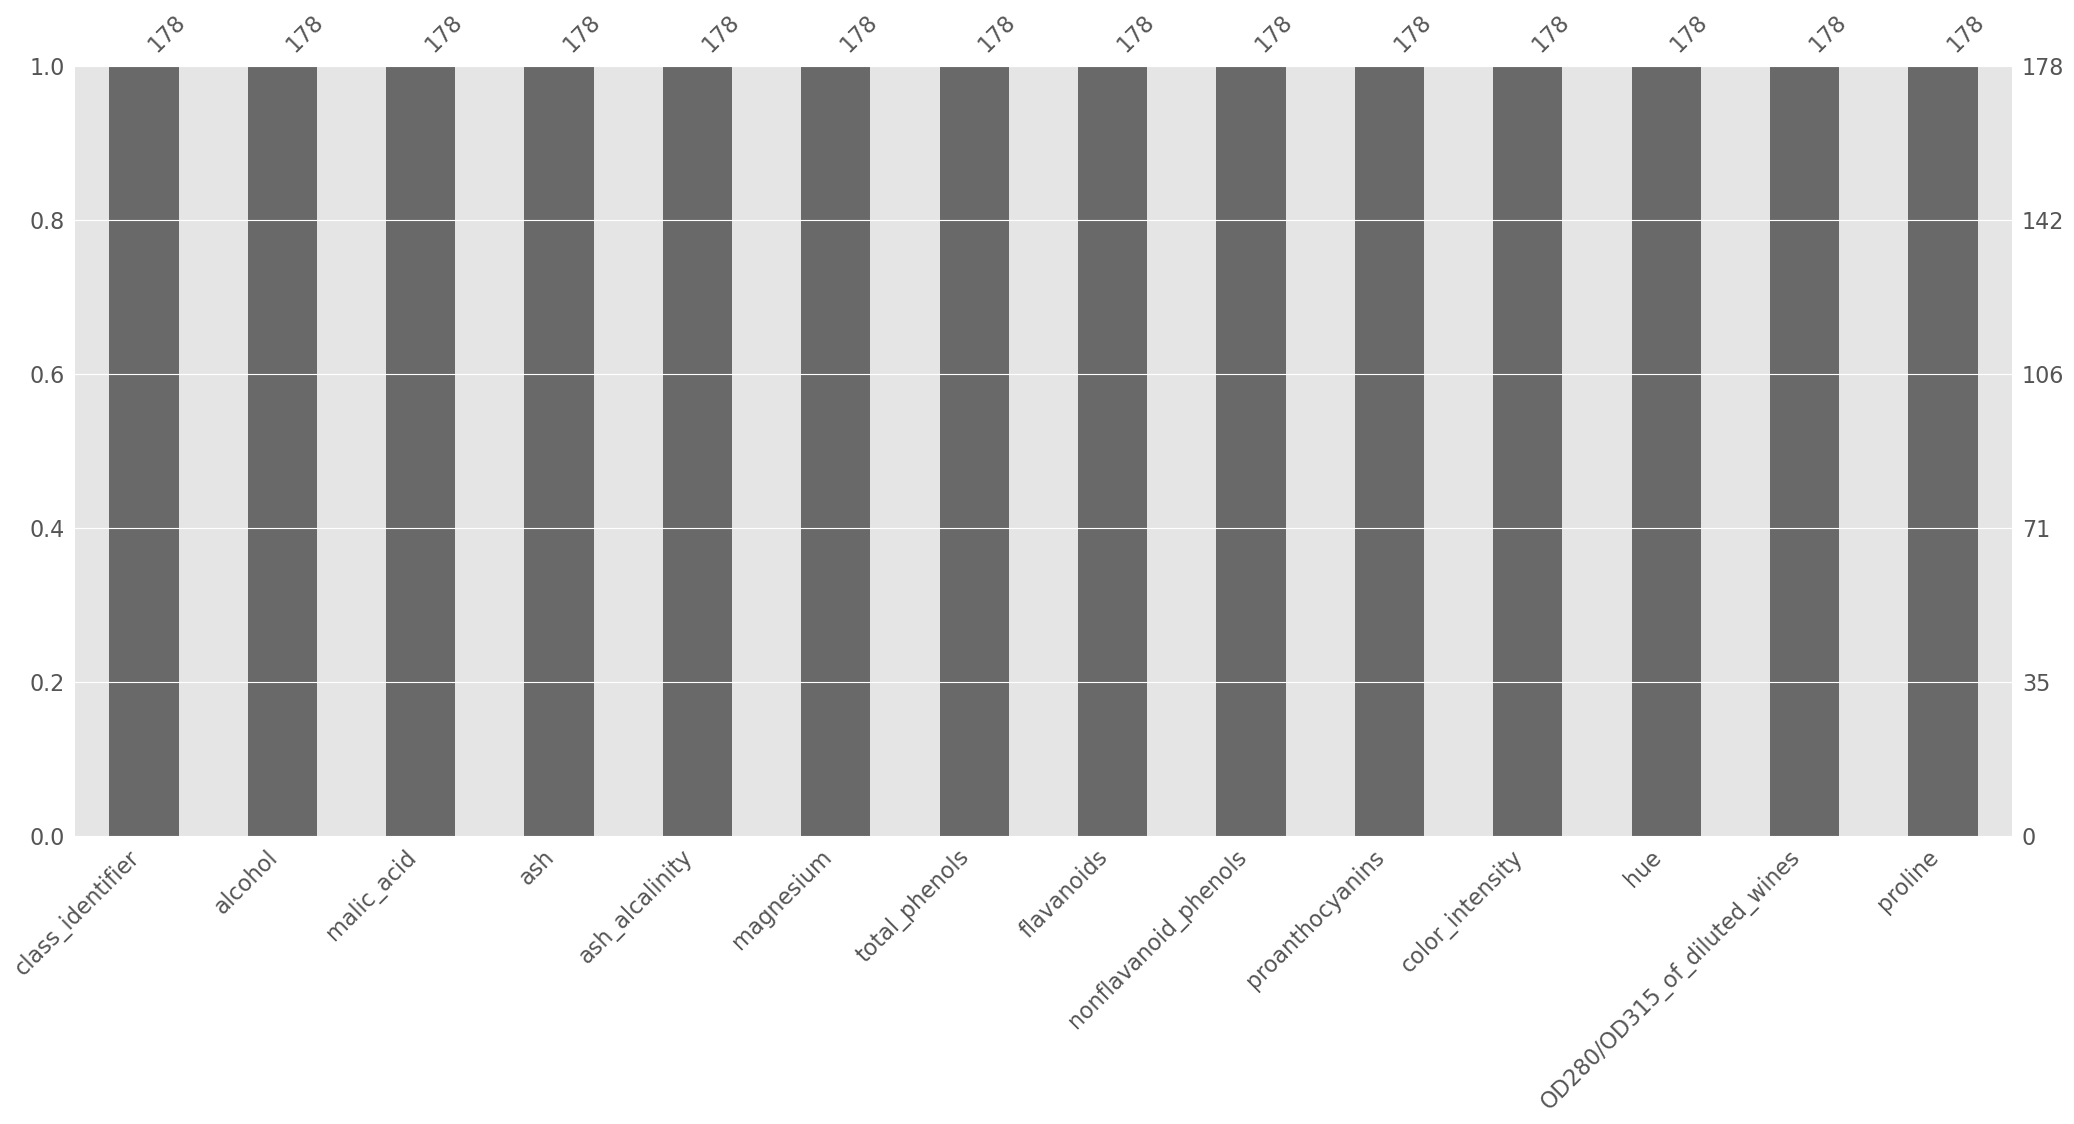

In [59]:
# Barplot de los nans
# ==================
msno.bar(df)
plt.show()

No parece que la base de datos contenga NaN o nulos.

<div class="alert alert-block alert-info">
    <b>Visualización variables</b></div>

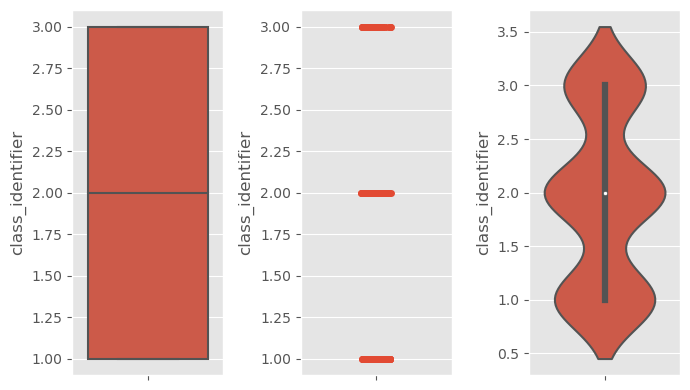

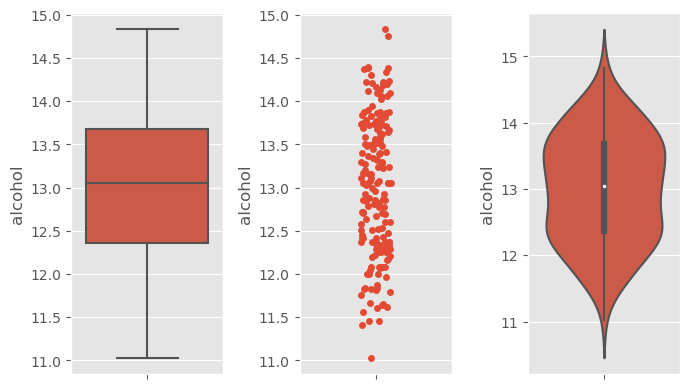

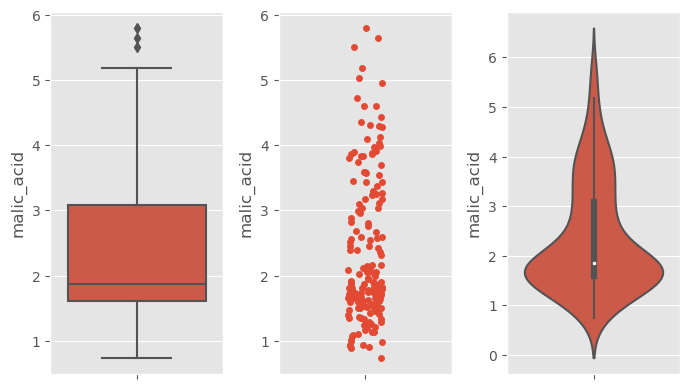

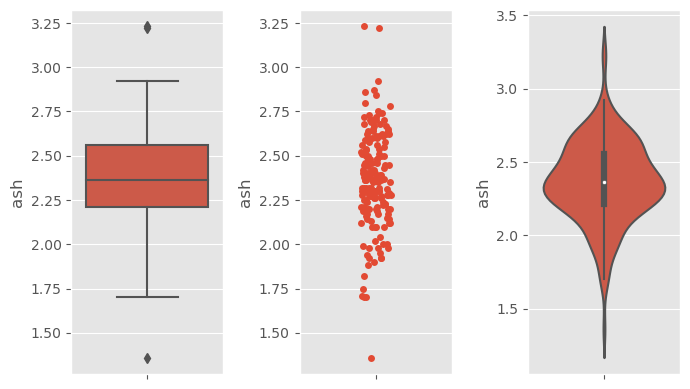

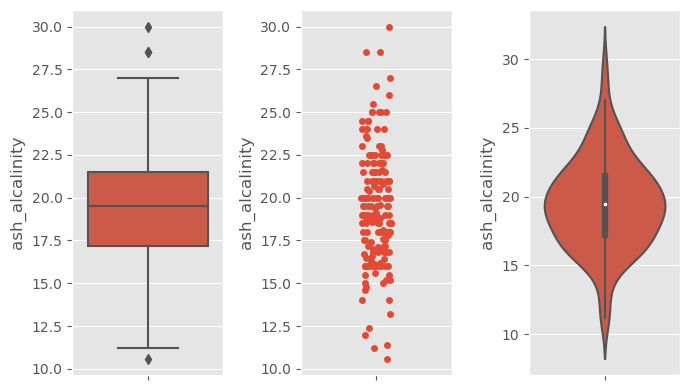

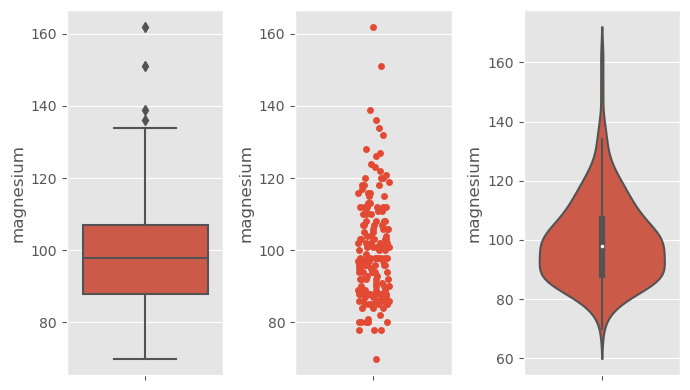

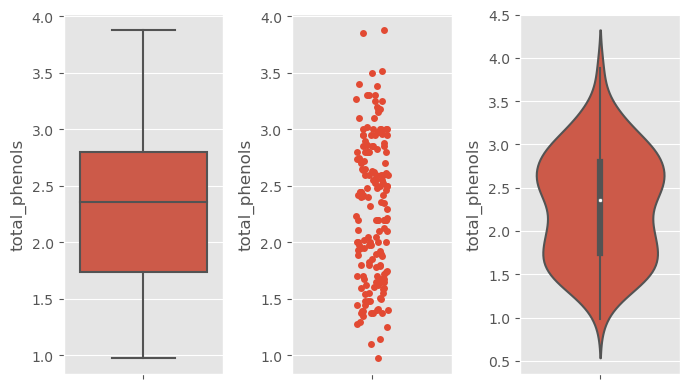

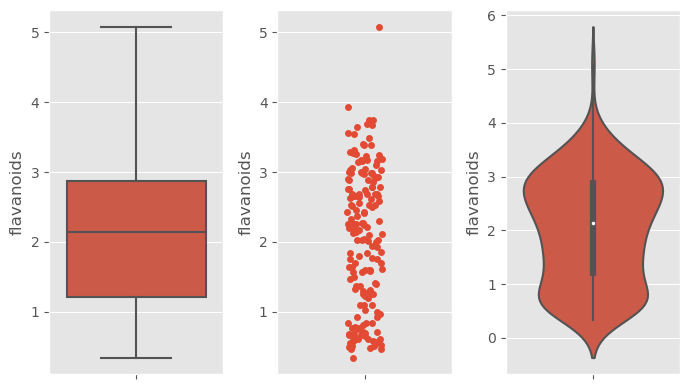

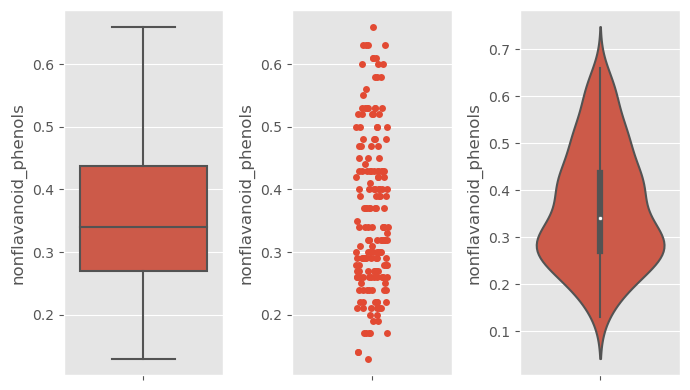

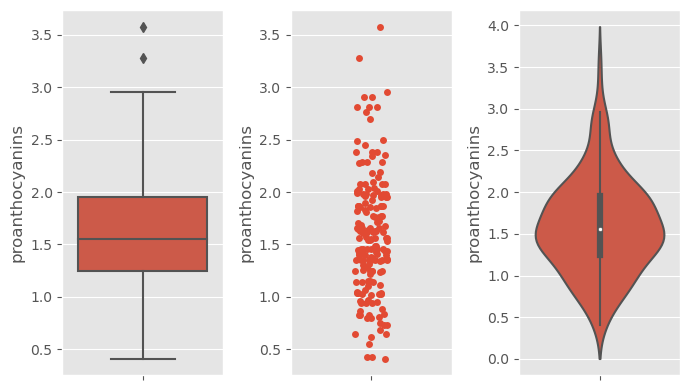

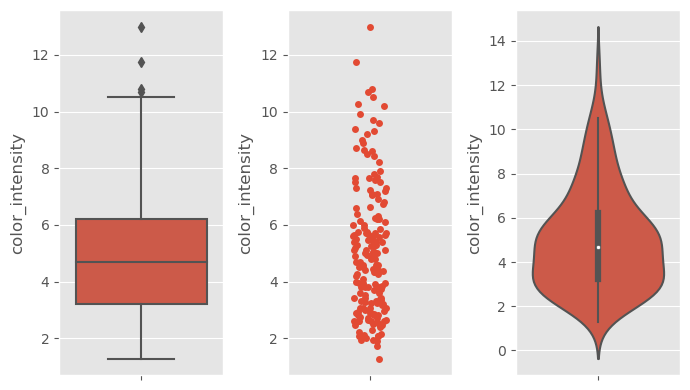

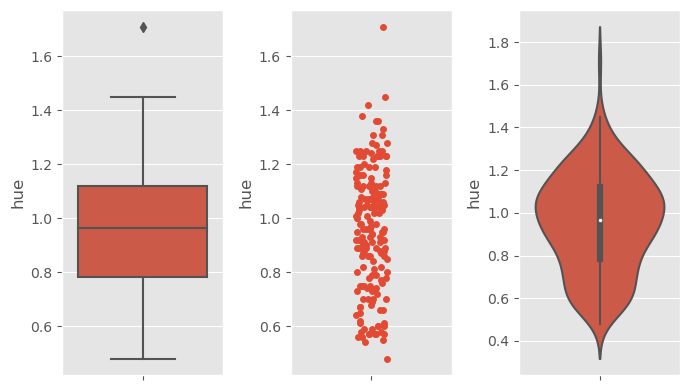

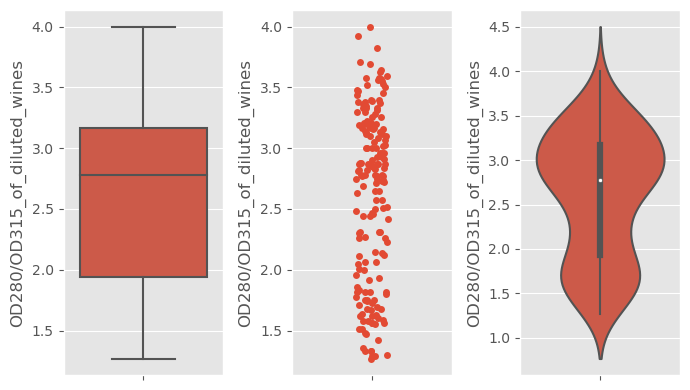

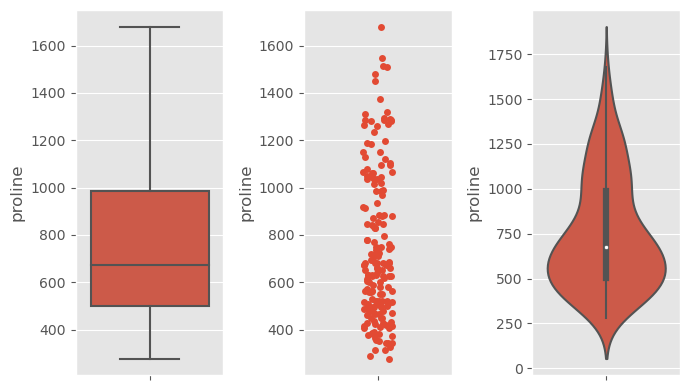

In [60]:
# Distribuciones: densidad, boxplot, astripchart, violinplot
# =======================================================================
for i in df:
    fig, axs = plt.subplots(ncols=3, figsize=(7, 4))

    sns.boxplot(data=df, y=i,ax=axs[0])
    sns.stripplot(y= i,data=df,ax=axs[1])
    sns.violinplot(data=df, y=i,ax=axs[2])
    fig.tight_layout()
    plt.show()

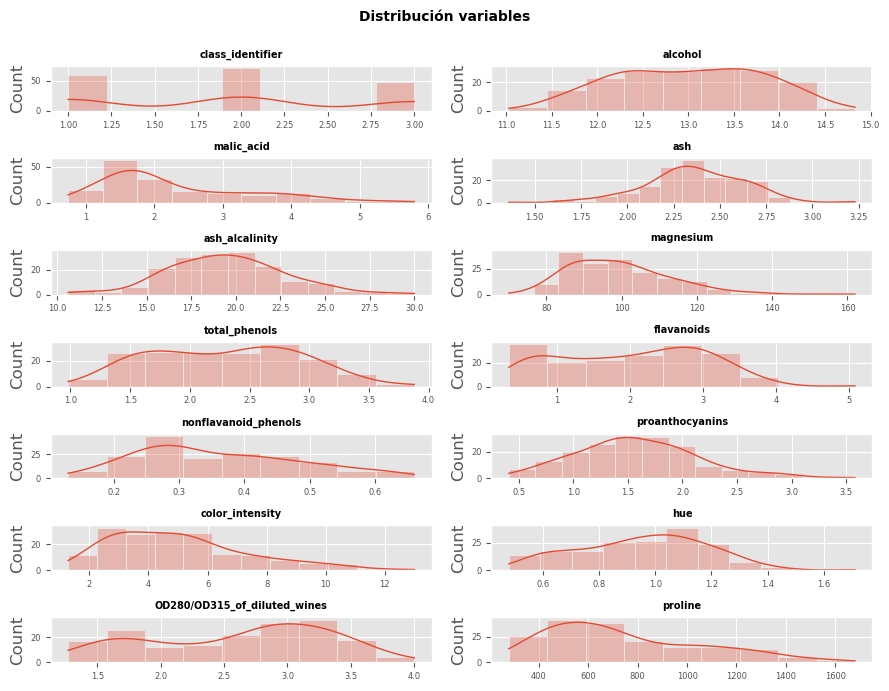

In [61]:
# Visualizamos la distribución de las variables.
# ==============================================================================
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(9, 7))
axes = axes.flat

for i, colum in enumerate(df):
    sns.histplot(
        data     = df,
        x        = colum,
        stat     = "count",
        kde      = True,
        line_kws = {'linewidth': 1},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables', fontsize = 10, fontweight = "bold");

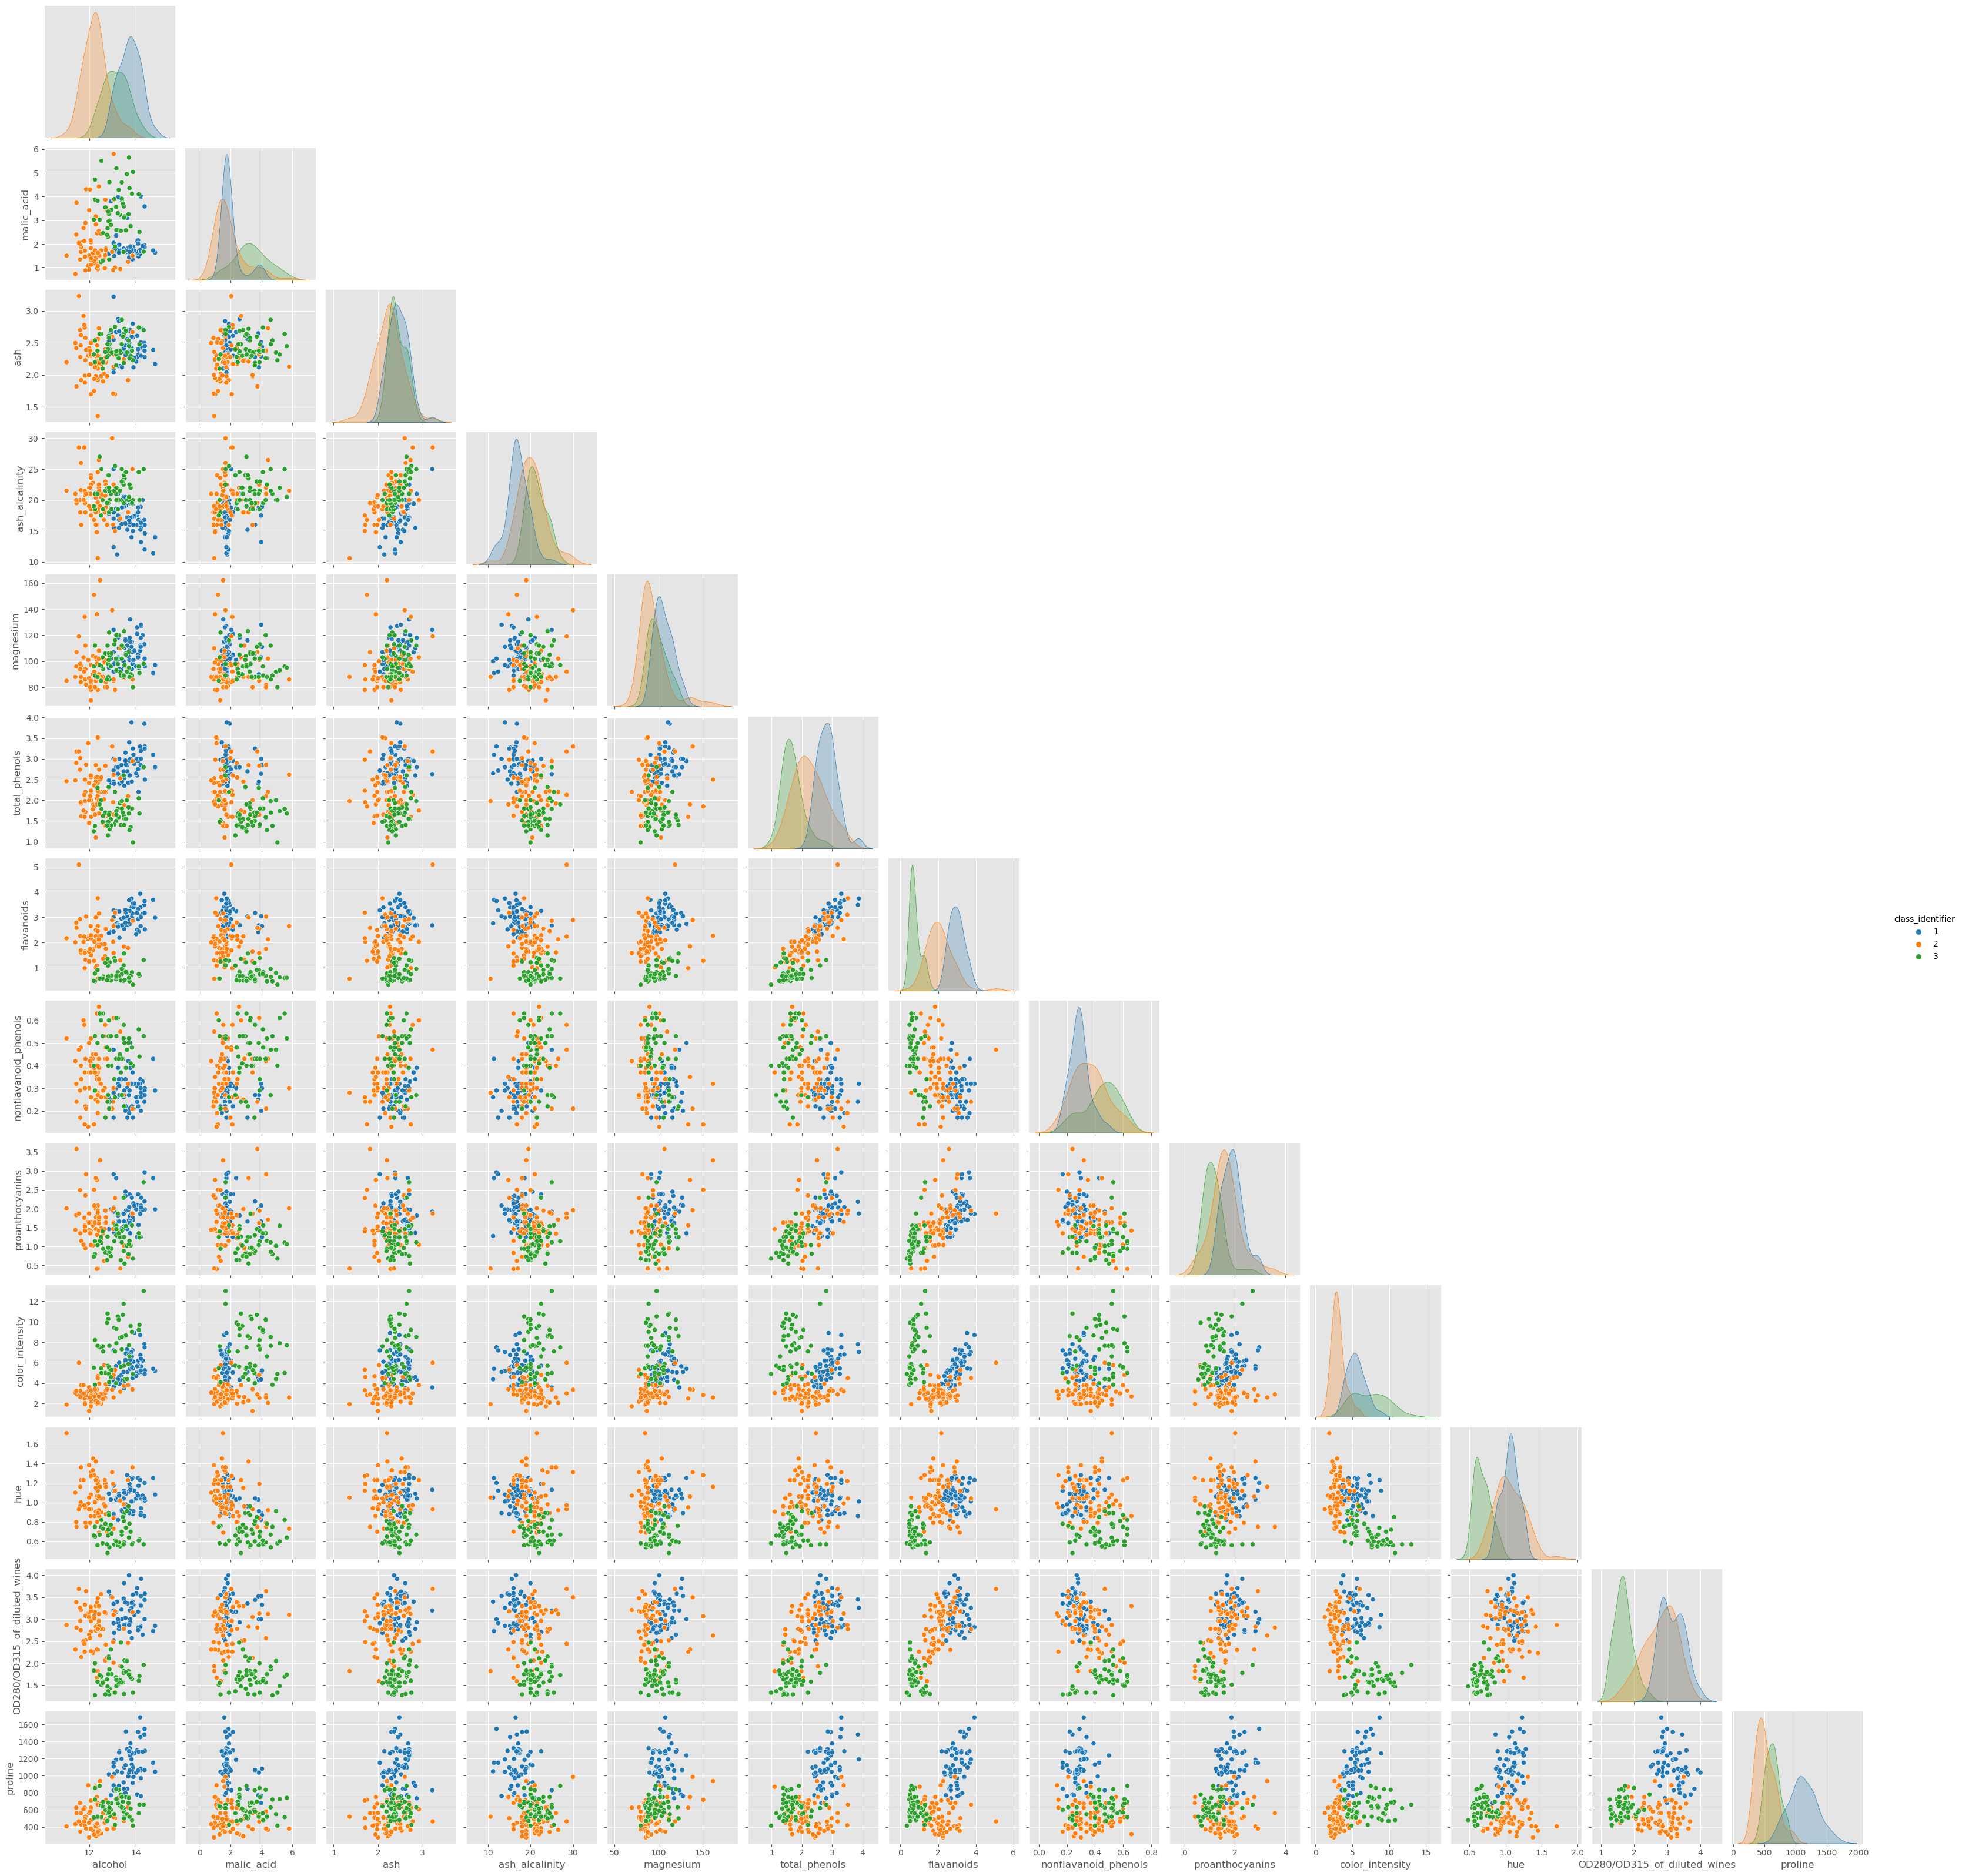

In [62]:
# Pairplot 
# La variable "class_identifier" se utiliza para asignar colores a los puntos y distinguir las clases. 
# =======================================================================================
sns.pairplot(df, 
             hue='class_identifier', 
             palette="tab10", 
             corner=True)

plt.show()

In [63]:
# Utilizamos el test de shapiro para verificar la hipótesis de una distribución normal
# ==============================================================================
for i in df:

    stat, p = stats.shapiro(df[i])
    print(f" {i} p-value = {p}")
    alpha = 0.05
    if p > alpha:
       print(f'no se rechaza la hipótesis nula H0')
    else:
       print(f'se rechaza la hipótesis nula H0')

 class_identifier p-value = 3.526998097335039e-14
se rechaza la hipótesis nula H0
 alcohol p-value = 0.020050711929798126
se rechaza la hipótesis nula H0
 malic_acid p-value = 2.94582247484243e-10
se rechaza la hipótesis nula H0
 ash p-value = 0.038691021502017975
se rechaza la hipótesis nula H0
 ash_alcalinity p-value = 0.26394858956336975
no se rechaza la hipótesis nula H0
 magnesium p-value = 6.345416068143095e-07
se rechaza la hipótesis nula H0
 total_phenols p-value = 0.0043947165831923485
se rechaza la hipótesis nula H0
 flavanoids p-value = 1.6790636436780915e-05
se rechaza la hipótesis nula H0
 nonflavanoid_phenols p-value = 0.00010552681487752125
se rechaza la hipótesis nula H0
 proanthocyanins p-value = 0.01445252075791359
se rechaza la hipótesis nula H0
 color_intensity p-value = 9.230111004399078e-07
se rechaza la hipótesis nula H0
 hue p-value = 0.01742566004395485
se rechaza la hipótesis nula H0
 OD280/OD315_of_diluted_wines p-value = 2.315865231139469e-06
se rechaza la h

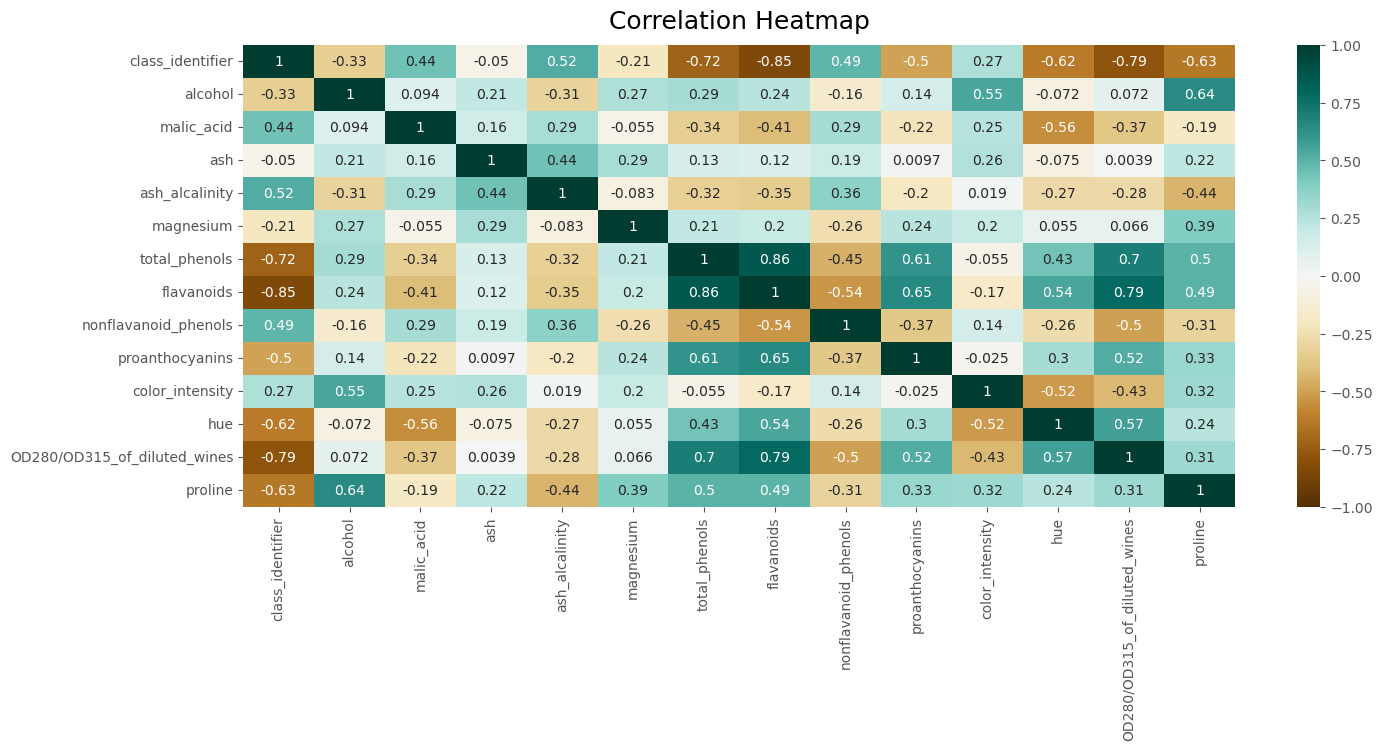

In [64]:
#Visualizamos la correlación entre variables
# =======================================================================
plt.figure(figsize=(16, 6))
matrix = np.triu(df.corr())
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.show()

In [65]:
#Correlacion de 'class_identifier' con las otras variables
# ==============================================
df.corr()['class_identifier'].sort_values(ascending=False)

class_identifier                1.000000
ash_alcalinity                  0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
OD280/OD315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: class_identifier, dtype: float64

Usamos el VIF (Factor de Inflación de la Varianza). En general, una multicolinealidad puede ser problematica cuando el VIF > 5.

In [66]:
# Crear funcion que calcule el VIF
# ==============================================
def compute_vif(considered_features):
    
    X = df[considered_features]
    # el calculo de la inflación de varianza requiere de una constante
    X['intercept'] = 1
    
    # se crea un dataframe para guardar las vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

#variables consideradas
considered_features = ['alcohol', 'malic_acid', 'ash', 'ash_alcalinity',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'OD280/OD315_of_diluted_wines', 'proline']


# calculo del vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable       VIF
6                     flavanoids  7.029350
5                  total_phenols  4.334519
11  OD280/OD315_of_diluted_wines  3.785473
9                color_intensity  3.026304
12                       proline  2.823849
10                           hue  2.551447
0                        alcohol  2.460372
3                 ash_alcalinity  2.238732
2                            ash  2.185448
8                proanthocyanins  1.975683
7           nonflavanoid_phenols  1.796380
1                     malic_acid  1.656647
4                      magnesium  1.417855

**Tras el analisis inicial podemos constatar que:**
- La variable 'flavanoids' parece ser la unica con un VIF alto. Segun los resultados decidiremos que hacer con ella.
- La variable "ash_alcalinity" parece ser la unica variable con distribución normal.
- Algunas variables, como 'total_phenols', 'OD280/OD315_of_diluted_wines' y 'flavanoids' tienen una correlación negativa fuerte con la variable target.
- Como tienen outliers, trataremos 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'proanthocyanins', 'color_intensity', 'hue' con robust scaler (lo haremos en el punto 5 ya que es lo que pide el ejercicio).
- Trataremos 'alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols','OD280/OD315_of_diluted_wines', 'proline' con minmax scaler(lo haremos en el punto 5 ya que es lo que pide el ejercicio).

In [67]:
# Partimos los datos
# ===============================
X = df.drop('class_identifier', axis = 1)
y = df['class_identifier'] 

In [68]:
# X, Y shape
# ===============================
print("X shape: ", X.shape)
print("Y shape: ", y.shape)

X shape:  (178, 13)
Y shape:  (178,)


In [69]:
# Dividimos los datos en conjuntos de entrenamiento y prueba con una proporción de 80/20
# El random_state hara que la muestra sea siempre la misma.
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = SEED,
                                        shuffle      = True
                                    )

In [70]:
# Guardar una copia X_train e X_test para poder usarlos despues
# =======================================================================
X_train_copy = X_train.copy()
X_test_copy =  X_test.copy()

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print('=========')
print(X_train_copy.shape)
print(X_test_copy.shape)

(142, 13)
(36, 13)
(142, 1)
(36, 1)
(142, 13)
(36, 13)


In [72]:
# Comprobamos que la matrix X sea singular. La falta de un rango completo seria fuerte indicador de collinearidad
# ================================================================================================================
print("Rank of X_train:", matrix_rank(X_train))
print("Rank of X_train_copy:", matrix_rank(X_train))

Rank of X_train: 13
Rank of X_train_copy: 13


<div class="alert alert-info" role="alert">
  <strong>Exercici 1:</strong> 
    <p> Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.</p>
</div>

Se realiza un evaluación previa rapida (Spot-check) para ver que modelos se adaptarian mejor a los datos

In [73]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVC'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [74]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED, shuffle=True)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: (Mean Accuracy - %f), (Standard Deviation - %f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [75]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [77]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train, models)
PlotBoxR().PlotResult(names,results)

KNN: (Mean Accuracy - 0.685621), (Standard Deviation - 0.055088)
CART: (Mean Accuracy - 0.894118), (Standard Deviation - 0.080118)
NB: (Mean Accuracy - 0.977778), (Standard Deviation - 0.036851)
SVC: (Mean Accuracy - 0.674510), (Standard Deviation - 0.091354)
AB: (Mean Accuracy - 0.910784), (Standard Deviation - 0.093513)
GBM: (Mean Accuracy - 0.933333), (Standard Deviation - 0.077778)
RF: (Mean Accuracy - 0.977778), (Standard Deviation - 0.050918)
ET: (Mean Accuracy - 0.988889), (Standard Deviation - 0.022222)


In [78]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [79]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

Model   Score
0   KNN  0.6856
1  CART  0.8941
2    NB  0.9778
3   SVC  0.6745
4    AB  0.9108
5   GBM  0.9333
6    RF  0.9778
7    ET  0.9889

Al parecer los tres modelos con mejores resultados son 'GaussianNB', 'RandomForestClassifier' y 'ExtraTreesClassifier'. Para hacer comparaciones, se selecciona tambien el modelo 'KNeighborsClassifier'y 'SupportVectorClassifier' cuyos resultados no han sido tan positivo.

In [80]:
# Modelo GaussianNB
#======================
nb_model = GaussianNB()
# Se Entrena el modelo
nb_model.fit(X_train, y_train)

GaussianNB()

In [81]:
# Modelo RandomForestClassifier
#=================================
rf_model = RandomForestClassifier(n_estimators=100, random_state=SEED)
# Se Entrena el modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
# Modelo ExtraTreesClassifier
#=================================
et_model = ExtraTreesClassifier(random_state=SEED)
# Se Entrena el modelo
et_model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [83]:
# Modelo SVC
#=================================
svc_model= SVC(probability=True, random_state=SEED)
# Se Entrena el modelo
svc_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [84]:
# Modelo KNeighborsClassifier
#=================================
knn_model = KNeighborsClassifier()
# Se Entrena el modelo
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

<div class="alert alert-info" role="alert">
  <strong>Exercici 2:</strong> 
    <p> Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.</p>
</div>

Comparamos los modelos elegidos usando:
- Accuracy: indica la cantidad de predicciones correctas divididas por el total de predicciones. A pesar de que las clases no esten totalmente balanceadas, podemos usar esta metrica ya que la diferencia es minima.
- F1:  combina la precision(proporción de instancias clasificadas como positivas que realmente lo son) y el recall(medición de la capacidad del modelo para encontrar correctamente todas las instancias positivas) en un solo valor para evaluar el rendimiento de un modelo de clasificación. 
- Confusion Matrix.

NB - Accuracy: 1.0000 - F1-score: 1.0000
RF - Accuracy: 1.0000 - F1-score: 1.0000
ET - Accuracy: 1.0000 - F1-score: 1.0000
SVC - Accuracy: 0.8056 - F1-score: 0.7640
KNN - Accuracy: 0.7222 - F1-score: 0.6726


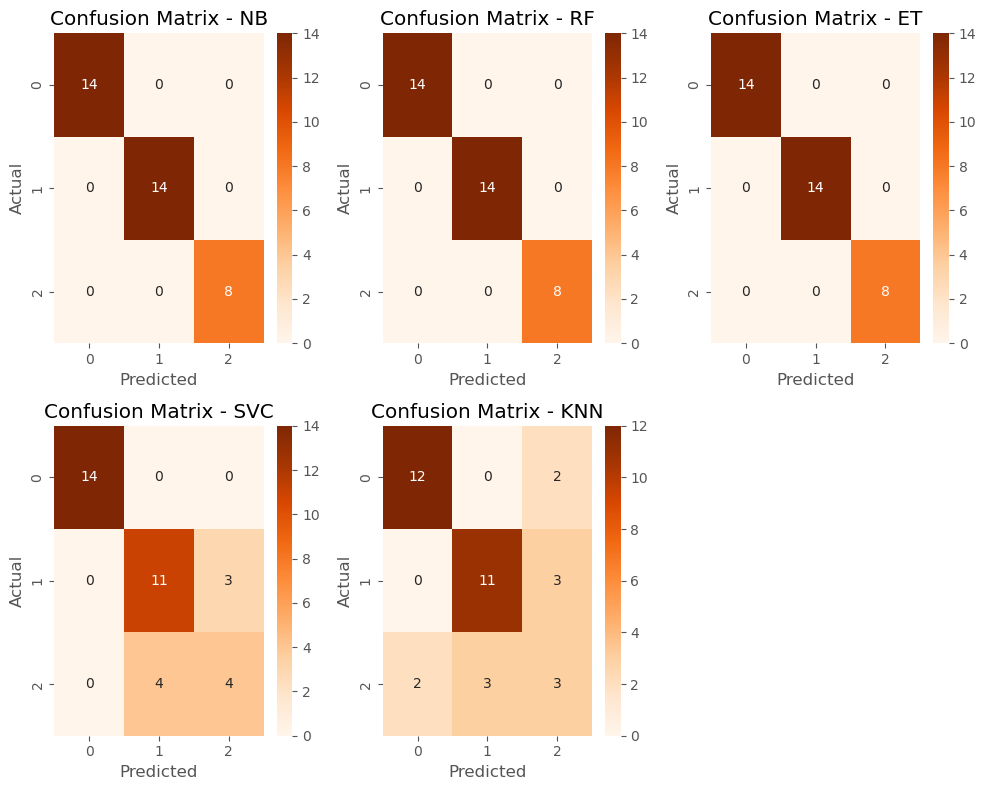

In [86]:
models = [
    ('NB', nb_model),
    ('RF', rf_model),
    ('ET', et_model),
    ('SVC', svc_model),
    ('KNN', knn_model)
]

accuracy_scores = []
f1_scores = []
confusion_matrices = [] 

for name, model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='macro')
    cf_matrix = confusion_matrix(y_test, y_pred)
    accuracy_scores.append((name, accuracy))
    f1_scores.append((name, f1))
    confusion_matrices.append((name, cf_matrix))

for i in range(len(models)):
    print(f"{models[i][0]} - Accuracy: {accuracy_scores[i][1]:.4f} - F1-score: {f1_scores[i][1]:.4f}")

fig, axes = plt.subplots(2, 3, figsize=(10, 8))

for i in range(len(models)):
    #print("Confusion Matrix:")
    #print(confusion_matrices[i][1])
    ax = axes[np.unravel_index(i, (2, 3))]  #metodo alternativo axes[i // 2, i % 3] Calculate subplot index
    sns.heatmap(confusion_matrices[i][1], annot=True, fmt='d', cmap='Oranges', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f"Confusion Matrix - {models[i][0]}")

#Se eliminan los axes vacíos
#=============================
if len(models) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

**Podemos observar que:**
- Los tres modelos 'GaussianNB', 'RandomForestClassifier' y 'ExtraTreesClassifier' demuestran un rendimiento perfecto en la clasificación de las muestras en el conjunto de prueba.
- El modelo 'SVC' ha logrado clasificar correctamente el 80.56% de muestras. Parece tener un buen equilibrio entre precision y recall con un F1 de 0.76. 
<br>Como podemos ver en la Confusion Matrix:
<br>En la clase1 el  modelo ha sido capaz de clasificar correctamente todas las muestras;
<br>En la clase2 hay tres muestras que se clasifican incorrectamente como clase3;
<br>En la clase3 hay cuatro muestras que se clasifican incorrectamente como clase2.
- El modelo KNN ha obtenido los resultados menos positivos, con un 72.22% de muestras clasificadas de forma correcta. 
<br>Como podemos ver en la Confusion Matrix:
<br>En la clase1 el modelo ha podido clasificar de forma correcta doce muestras, clasificando de forma incorrecta como clase3 dos de ellas;
<br>En la clase2 hay 3 muestras que se clasifican incorrectamente como clase3;
<br>En la clase3 hay 3 muestras que se clasifican incorrectamente como clase2 y dos que se clasifican incorrectamente como clase1.

Intentaremos mejorar estos dos ultimos modelos.

<div class="alert alert-info" role="alert">
  <strong>Exercici 3:</strong> 
    <p> Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.</p>
</div>

- Mejora modelo KNN con Optuna

In [87]:
def knn_objective(trial):
    param = {
        'n_neighbors': trial.suggest_int("n_neighbors", 3, 30),
        'weights': trial.suggest_categorical("weights", ['uniform', 'distance']),
        'algorithm': trial.suggest_categorical("algorithm", ['auto', 'ball_tree', 'kd_tree', 'brute']),
        'leaf_size': trial.suggest_int("leaf_size", 10, 50),
        'p': trial.suggest_int("p", 1, 2)
    }

    model = KNeighborsClassifier(**param)

    return cross_val_score(model, X, y, cv=5).mean()

knn_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
knn_study.optimize(knn_objective, n_trials=50)

print('Best trial: score {},\nparams {}'.format(knn_study.best_trial.value,knn_study.best_trial.params))

[I 2023-07-10 11:16:27,132] A new study created in memory with name: no-name-6834dc00-970a-41d7-980f-4873c93ced21
[I 2023-07-10 11:16:27,168] Trial 0 finished with value: 0.7196825396825396 and parameters: {'n_neighbors': 30, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 34, 'p': 2}. Best is trial 0 with value: 0.7196825396825396.
[I 2023-07-10 11:16:27,203] Trial 1 finished with value: 0.696984126984127 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 33, 'p': 2}. Best is trial 0 with value: 0.7196825396825396.
[I 2023-07-10 11:16:27,237] Trial 2 finished with value: 0.7195238095238095 and parameters: {'n_neighbors': 21, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 37, 'p': 2}. Best is trial 0 with value: 0.7196825396825396.
[I 2023-07-10 11:16:27,266] Trial 3 finished with value: 0.7701587301587302 and parameters: {'n_neighbors': 30, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 31, 'p': 1}. Best is t

[I 2023-07-10 11:16:31,573] Trial 35 finished with value: 0.7082539682539682 and parameters: {'n_neighbors': 14, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 42, 'p': 2}. Best is trial 15 with value: 0.7871428571428571.
[I 2023-07-10 11:16:31,626] Trial 36 finished with value: 0.7084126984126984 and parameters: {'n_neighbors': 22, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 36, 'p': 1}. Best is trial 15 with value: 0.7871428571428571.
[I 2023-07-10 11:16:31,672] Trial 37 finished with value: 0.7084126984126984 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 30, 'p': 2}. Best is trial 15 with value: 0.7871428571428571.
[I 2023-07-10 11:16:31,722] Trial 38 finished with value: 0.7703174603174603 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 47, 'p': 1}. Best is trial 15 with value: 0.7871428571428571.
[I 2023-07-10 11:16:32,503] Trial 39 finished with value: 0.696

Best trial: score 0.7871428571428571,
params {'n_neighbors': 15, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 42, 'p': 1}


In [88]:
# Creamos nuevo modelo con nuevos parametros
# ============================================

knn_best_params = knn_study.best_trial.params

knn_model_gearsecond = KNeighborsClassifier(**knn_best_params)

knn_model_gearsecond.fit(X_train,y_train)

knn_model_gearsecond.get_params()

{'algorithm': 'ball_tree',
 'leaf_size': 42,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 15,
 'p': 1,
 'weights': 'distance'}

- Mejoramos modelo SVC con Optuna

In [89]:
def svc_objective(trial):
    param = {
            'kernel' : trial.suggest_categorical("kernel",['linear', 'poly']),
            'gamma' : trial.suggest_float("gamma",0.001,0.99), 
            'C': trial.suggest_float("C", 0.1, 10.0),
            'degree': trial.suggest_int("degree", 1, 5)
            }
    
    model = SVC(**param, probability=True, random_state=SEED)
    
    return cross_val_score(model, X, y, cv=5).mean()

svc_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
svc_study.optimize(svc_objective, n_trials=5)

print('Best trial: score {},\nparams {}'.format(svc_study.best_trial.value,svc_study.best_trial.params))

[I 2023-07-10 11:16:46,383] A new study created in memory with name: no-name-21c9156e-bb04-441a-ac09-9c26e7dd8bc9
[I 2023-07-10 11:16:49,134] Trial 0 finished with value: 0.9555555555555555 and parameters: {'kernel': 'poly', 'gamma': 0.8151060814313368, 'C': 5.913007846210536, 'degree': 5}. Best is trial 0 with value: 0.9555555555555555.
[I 2023-07-10 11:16:51,592] Trial 1 finished with value: 0.9666666666666666 and parameters: {'kernel': 'poly', 'gamma': 0.8506313044728955, 'C': 9.029508010778676, 'degree': 2}. Best is trial 1 with value: 0.9666666666666666.
[I 2023-07-10 11:16:54,521] Trial 2 finished with value: 0.9555555555555555 and parameters: {'kernel': 'poly', 'gamma': 0.9222336838490985, 'C': 0.6982148565751631, 'degree': 5}. Best is trial 1 with value: 0.9666666666666666.
[I 2023-07-10 11:16:57,659] Trial 3 finished with value: 0.961111111111111 and parameters: {'kernel': 'linear', 'gamma': 0.6064393069352776, 'C': 9.027527212287277, 'degree': 2}. Best is trial 1 with value: 

Best trial: score 0.9666666666666666,
params {'kernel': 'poly', 'gamma': 0.8506313044728955, 'C': 9.029508010778676, 'degree': 2}


In [90]:
# Creamos nuevo modelo con nuevos parametros
# ============================================

svc_best_params = svc_study.best_trial.params

svc_model_gearsecond = SVC(**svc_best_params, probability=True, random_state=SEED)

svc_model_gearsecond.fit(X_train,y_train)

svc_model_gearsecond.get_params()

{'C': 9.029508010778676,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 0.8506313044728955,
 'kernel': 'poly',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Parece ser que los algoritmos se han visto beneficiados tras la optimizacion, en especial modo el SVC.

<div class="alert alert-info" role="alert">
  <strong>Exercici 4:</strong> 
    <p> Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.</p>
</div>

SVC - Accuracy: 0.8056 - F1-score: 0.7640
KNN - Accuracy: 0.7222 - F1-score: 0.6726
SVC_gearsecond - Accuracy: 1.0000 - F1-score: 1.0000
KNN_gearsecond - Accuracy: 0.8611 - F1-score: 0.8392


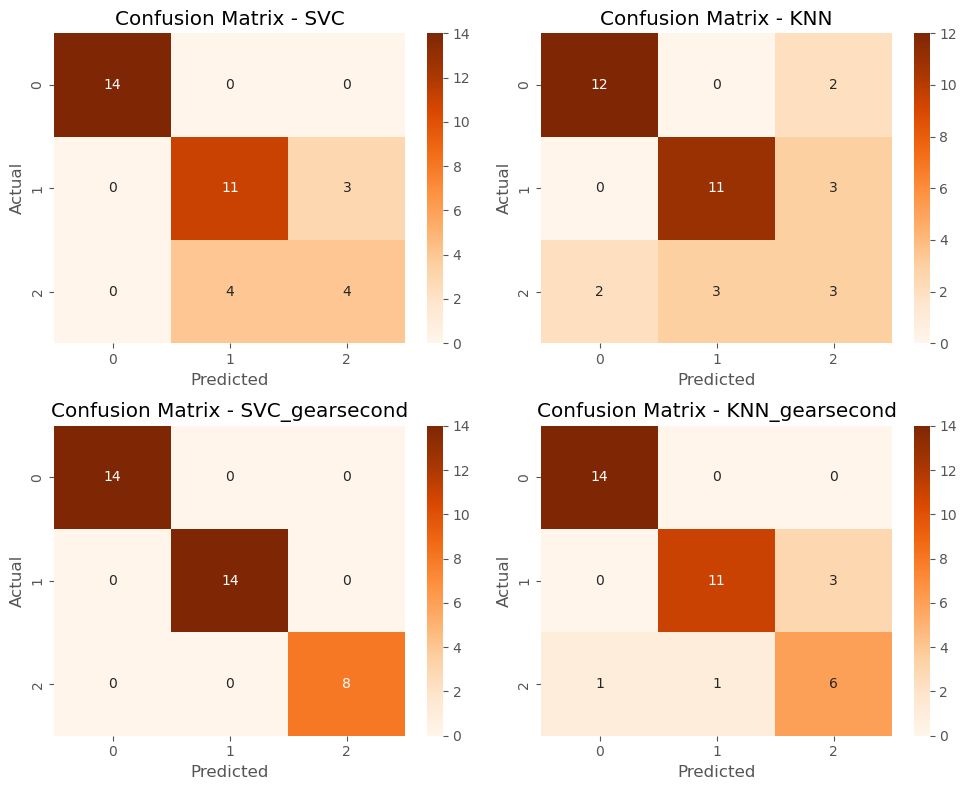

In [91]:
# Comparamos el rendimiento de los nuevos modelos con los modelos sin mejorar
# ============================================================================
models = [
    ('SVC', svc_model),#modelo sin mejorar
    ('KNN', knn_model),#modelo sin mejorar
    ('SVC_gearsecond', svc_model_gearsecond),#modelo mejorado
    ('KNN_gearsecond', knn_model_gearsecond)#modelo mejorado
]

accuracy_scores = []
f1_scores = []
confusion_matrices = [] 

for name, model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='macro')
    cf_matrix = confusion_matrix(y_test, y_pred)
    accuracy_scores.append((name, accuracy))
    f1_scores.append((name, f1))
    confusion_matrices.append((name, cf_matrix))

for i in range(len(models)):
    print(f"{models[i][0]} - Accuracy: {accuracy_scores[i][1]:.4f} - F1-score: {f1_scores[i][1]:.4f}")

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i in range(len(models)):
    #print("Confusion Matrix:")
    #print(confusion_matrices[i][1])
    ax = axes[np.unravel_index(i, (2, 2))]  #metodo alternativo axes[i // 2, i % 3] Calculate subplot index
    sns.heatmap(confusion_matrices[i][1], annot=True, fmt='d', cmap='Oranges', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f"Confusion Matrix - {models[i][0]}")

plt.tight_layout()

**Podemos observar que:**
- El modelo SVC ha alcanzato el 100% de su capacidad tras mejorar los parametros y ha sido capaz de predecir correctamente todos los valores.
- El modelo KNN tambien se ha visto beneficiado por la mejora, alcazando un capacidad de clasificar correctamente los datos del 86.11%. 
<br>Como podemos ver en la Confusion Matrix: 
<br>En la clase1 el modelo ha podido clasificar de forma correcta todas las muestras; 
<br>En la clase2 el resultado no ha mejorado; 
<br>En la clase3 el resultado ha mejorado y ahora tenemos solo 1 muestra que se clasifican incorrectamente como clase2 y 1 que se clasifican incorrectamente como clase1.

<div class="alert alert-info" role="alert">
  <strong>Exercici 5:</strong> 
    <p> Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)</p>
</div>

Aplicamos el Robustscaler a las variables con outliers y MinMaxscalers al resto de variables.

In [92]:
# Robust scaler
#===================
robust_scaler = RobustScaler()

# Se aplica ek RobustScaler a las variables seleccionadas en X_train
#====================================================================
X_train_copy[['malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'proanthocyanins', 'color_intensity', 'hue']] = robust_scaler.fit_transform(X_train_copy[['malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'proanthocyanins', 'color_intensity', 'hue']])

# Aplicar RobustScaler a las columnas seleccionadas en X_test
#=============================================================
X_test_copy[['malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'proanthocyanins', 'color_intensity', 'hue']] = robust_scaler.transform(X_test_copy[['malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'proanthocyanins', 'color_intensity', 'hue']])

In [93]:
# MinMax scaler
#===================
minmax_scaler = MinMaxScaler()

# Se aplicar MinMaxScaler a las variables seleccionadas en X
#=============================================================
X_train_copy[['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols','OD280/OD315_of_diluted_wines', 'proline']] = minmax_scaler.fit_transform(X_train_copy[['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols','OD280/OD315_of_diluted_wines', 'proline']])

# Aplicar MinMaxScaler a las columnas seleccionadas en X_test
#=============================================================
X_test_copy[['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols','OD280/OD315_of_diluted_wines', 'proline']] = minmax_scaler.transform(X_test_copy[['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols','OD280/OD315_of_diluted_wines', 'proline']])

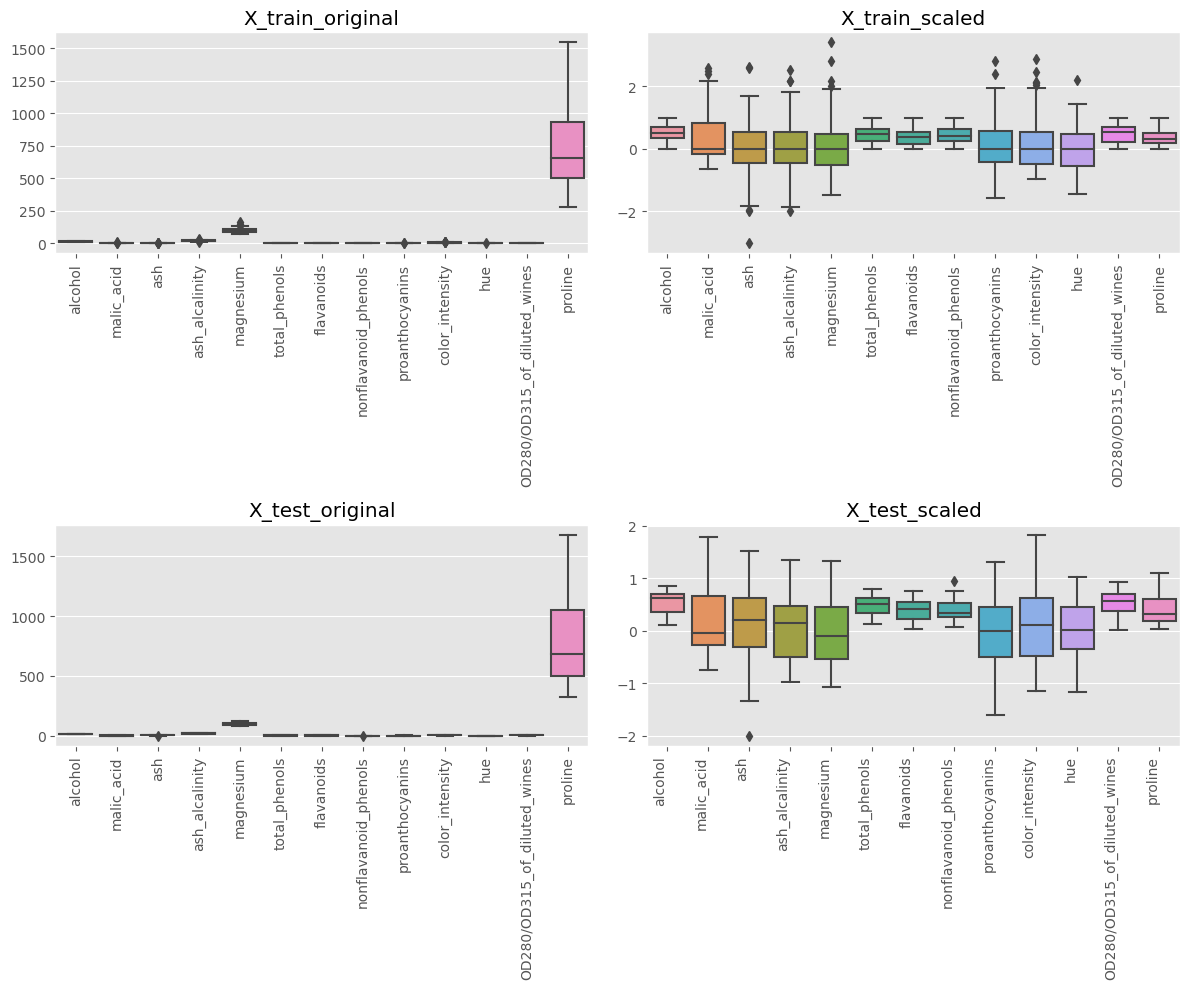

In [94]:
# Visualizamos X_train and X_test
# =========================================

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

plt.xticks(rotation=45, ha='right')

plot1=sns.boxplot(data=X_train[['alcohol', 'malic_acid', 'ash', 'ash_alcalinity',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'OD280/OD315_of_diluted_wines', 'proline']], ax=ax[0, 0])
ax[0, 0].set_title('X_train_original')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('')
ax[0, 0].tick_params(axis='x', rotation=90)

plot1=sns.boxplot(data=X_train_copy[['alcohol', 'malic_acid', 'ash', 'ash_alcalinity',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'OD280/OD315_of_diluted_wines', 'proline']], ax=ax[0,1])
ax[0, 1].set_title('X_train_scaled')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')
ax[0, 1].tick_params(axis='x', rotation=90)

plot1=sns.boxplot(data=X_test[['alcohol', 'malic_acid', 'ash', 'ash_alcalinity',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'OD280/OD315_of_diluted_wines', 'proline']], ax=ax[1,0])
ax[1, 0].set_title('X_test_original')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('')
ax[1, 0].tick_params(axis='x', rotation=90)

plot1=sns.boxplot(data=X_test_copy[['alcohol', 'malic_acid', 'ash', 'ash_alcalinity',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'OD280/OD315_of_diluted_wines', 'proline']], ax=ax[1,1])
ax[1, 1].set_title('X_test_scaled')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')
ax[1, 1].tick_params(axis='x', rotation=90)

fig.tight_layout()

plt.show()

**Usaremos un modelo KNeighborsClassifier para ver si el proceso de normalization/standardization de los datos puede mejorar el resultado y tambien usaremos un modelo DecisionTreeClassifier para hacer comparaciones.**

In [95]:
# Creamos un nuevo modelo Modelo KNeighborsClassifier
#========================================================
knn_model_gearthird = KNeighborsClassifier()
# Se Entrena el modelo
knn_model_gearthird.fit(X_train_copy, y_train)

KNeighborsClassifier()

In [96]:
# Creamos un nuevo modelo Modelo KNeighborsClassifier
#====================================================
cart_model = DecisionTreeClassifier(random_state=SEED)
# Se Entrena el modelo
cart_model.fit(X_train_copy, y_train)

DecisionTreeClassifier(random_state=42)

CART - Accuracy: 0.9444 - F1-score: 0.9425
KNN - Accuracy: 0.8611 - F1-score: 0.8641


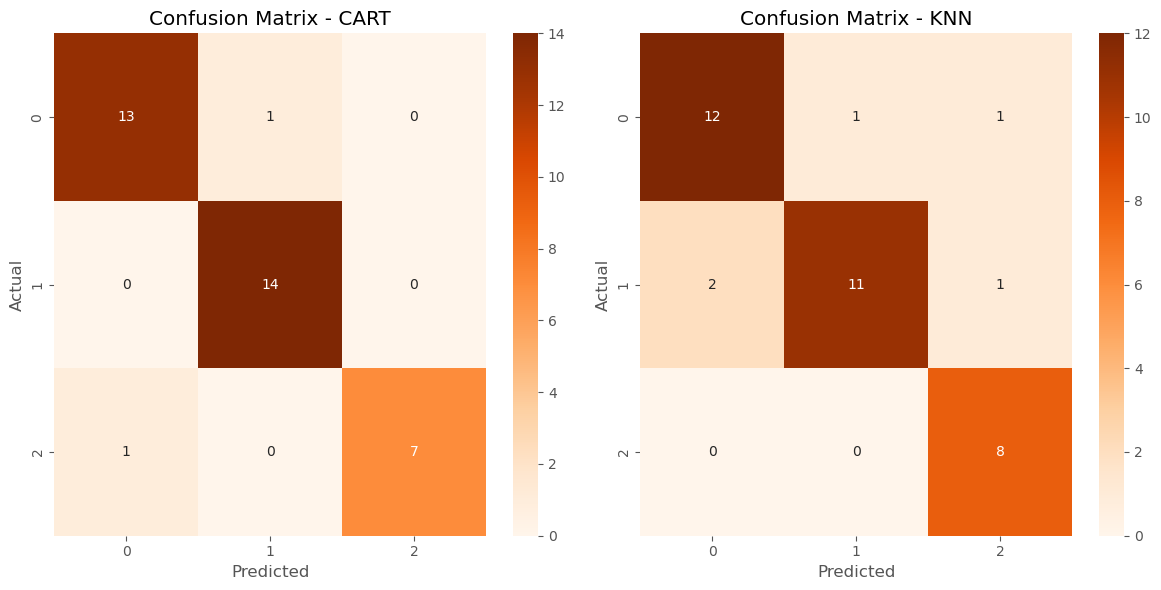

In [97]:
models = [
    ('CART', cart_model),
    ('KNN', knn_model_gearthird)
]

accuracy_scores = []
f1_scores = []
confusion_matrices = [] 

for name, model in models:
    y_pred = model.predict(X_test_copy)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='macro')
    cf_matrix = confusion_matrix(y_test, y_pred)
    accuracy_scores.append((name, accuracy))
    f1_scores.append((name, f1))
    confusion_matrices.append((name, cf_matrix))

for i in range(len(models)):
    print(f"{models[i][0]} - Accuracy: {accuracy_scores[i][1]:.4f} - F1-score: {f1_scores[i][1]:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i in range(len(models)):
    ax = axes[i]
    sns.heatmap(confusion_matrices[i][1], annot=True, fmt='d', cmap='Oranges', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f"Confusion Matrix - {models[i][0]}")

plt.tight_layout()

Podemos ver que los resultados de base de los dos modelos han mejorado tras la normalization/standardization de los datos.
- El modelo CART ha sido capaz de predecir un 94% de las muestras de forma correcta. La Confusion Matrix muestra que ha podido clasificar correctamente 13 muestras para la clase1 equivocandose solo en una, mientras que ha podido clasificar correctamente todas las muestras en la clase2 y ha cometido un solo error en la clase tres clasificando una muestra de forma incorrecta como clase1.
- El modelo KNN muestra una capacidad de clasificación de un 86.11%. La confusion matrix muestra que en la clase uno el modelo ha sido erroneo en clasificar una muestra como clase2 y otra como clase3, mientras que en la clase 3 ha clasificado de forma incorrecta dos muestras como si fueran clase1 y 1 como si fuera clase3.

Intentamos mejorar los dos modelos usando Optuna.

In [98]:
# Creamos un nuevo modelo Modelo KNeighborsClassifier utilizando los best_parameters encontrados anteriormente
#================================================================================================================
knn_model_gearfourth = KNeighborsClassifier(**knn_best_params)
# Se Entrena el modelo
knn_model_gearfourth.fit(X_train_copy, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=42, n_neighbors=15, p=1,
                     weights='distance')

Buscamos mejores parametros para el modelo CART 

In [99]:
def cart_objective(trial):
    param = {
        'criterion': trial.suggest_categorical("criterion", ['gini', 'entropy']),
        'max_depth': trial.suggest_int("max_depth", 1, 10),
        'min_samples_split': trial.suggest_int("min_samples_split", 2, 10),
        'min_samples_leaf': trial.suggest_int("min_samples_leaf", 1, 5),
        'max_features': trial.suggest_categorical("max_features", ['auto', 'sqrt', 'log2'])
            }
    
    model = DecisionTreeClassifier(**param, random_state=SEED)
    
    return cross_val_score(model, X, y, cv=5).mean()

cart_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
cart_study.optimize(cart_objective, n_trials=20)

print('Best trial: score {},\nparams {}'.format(cart_study.best_trial.value,cart_study.best_trial.params))

[I 2023-07-10 11:21:51,418] A new study created in memory with name: no-name-7058309d-ac2b-4609-be4b-8ac851f5dc4e
[I 2023-07-10 11:21:51,446] Trial 0 finished with value: 0.922063492063492 and parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.922063492063492.
[I 2023-07-10 11:21:51,477] Trial 1 finished with value: 0.9166666666666667 and parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 0.922063492063492.
[I 2023-07-10 11:21:51,501] Trial 2 finished with value: 0.910952380952381 and parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 0 with value: 0.922063492063492.
[I 2023-07-10 11:21:51,534] Trial 3 finished with value: 0.910952380952381 and parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samp

Best trial: score 0.9331746031746032,
params {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2'}


In [100]:
# Creamos nuevo modelo con nuevos parametros
# ============================================

cart_best_params = cart_study.best_trial.params

cart_model_gearsecond = DecisionTreeClassifier(**cart_best_params, random_state=SEED)

cart_model_gearsecond.fit(X_train_copy,y_train)

cart_model_gearsecond.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

CART_gearsecond - Accuracy: 0.9167 - F1-score: 0.9185
KNN_gearfourth - Accuracy: 0.9167 - F1-score: 0.9182


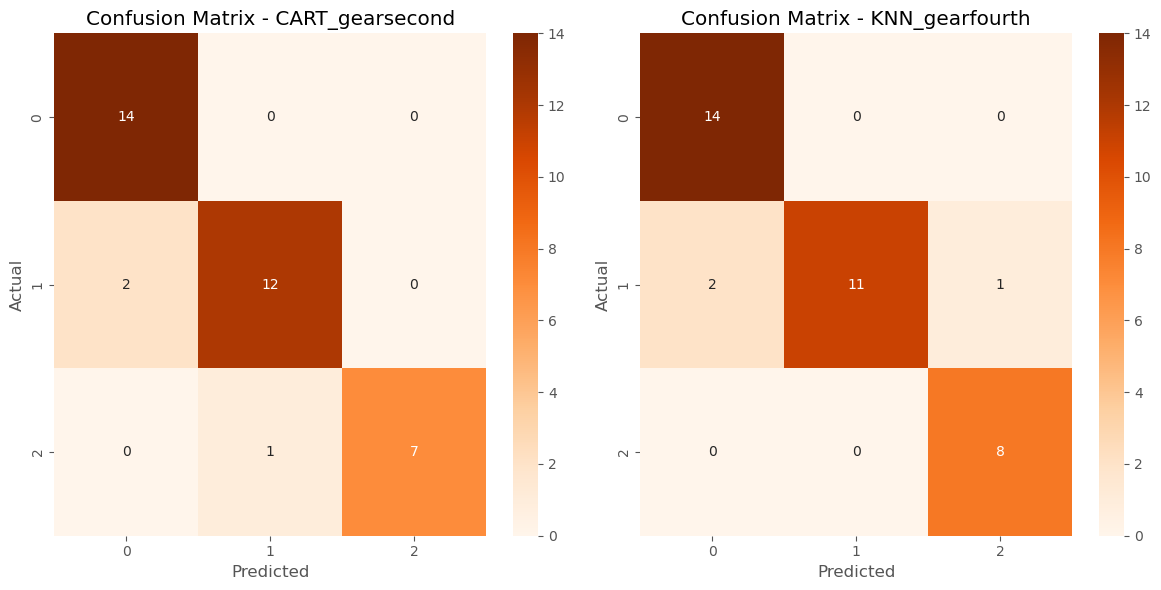

In [101]:
models = [
    ('CART_gearsecond', cart_model_gearsecond),
    ('KNN_gearfourth', knn_model_gearfourth)
]

accuracy_scores = []
f1_scores = []
confusion_matrices = [] 

for name, model in models:
    y_pred = model.predict(X_test_copy)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='macro')
    cf_matrix = confusion_matrix(y_test, y_pred)
    accuracy_scores.append((name, accuracy))
    f1_scores.append((name, f1))
    confusion_matrices.append((name, cf_matrix))

for i in range(len(models)):
    print(f"{models[i][0]} - Accuracy: {accuracy_scores[i][1]:.4f} - F1-score: {f1_scores[i][1]:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i in range(len(models)):
    ax = axes[i]
    sns.heatmap(confusion_matrices[i][1], annot=True, fmt='d', cmap='Oranges', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f"Confusion Matrix - {models[i][0]}")

plt.tight_layout()

**En conclusion podemos ver que:**
- Parece que el modelo CART se haya visto penalizado por la mejora de parametros, por lo menos en accuracy, pasando de una puntuación de 94.44% a una de 91.67%, a pesar de haber mejorado el CVScore, como podemos apreciar en el resultado de la optimización a traves de Optuna, probablemente porque el mismo se calcula sobre conjuntos de datos y como valor final presenta el promedio del resultado de los mismos, mientras que el accuracy se calcula directamente comparando las predicciones del modelo con los valores verdaderos del set de pruebas.
- Por lo contrario, el modelo KNN se ha visto beneficiado por el ajuste de parametros, alcanzando el 91.67% de clasificaciones correctas. Podemos ver en la Confuzion Matrix que la mejora es visible en la clasificacion de las muestras en la clase1 ha pasado a ser totalmente correcta.